# Setting

In [1]:
from pf_utils import PortfolioManager as PM 
from pf_utils import BacktestManager
from pf_widgets import WidgetUniverse, WidgetTransaction

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
path_data = 'data'

# Universe

In [3]:
PM.review('universe')

Universe: UV_K200, UV_KRX, UV_LIQ, UV_WTR, UV_ETF, UV_IRP, UV_HANA, UV_FCTR


In [4]:
PM.review_universe('UV_WTR')

{'universe': 'etf',
 'file': 'etfs_weather',
 'upload_type': 'price',
 'path': 'data'}

In [5]:
WidgetUniverse

## WTR

In [6]:
PM.review_universe('UV_WTR')

{'universe': 'etf',
 'file': 'etfs_weather',
 'upload_type': 'price',
 'path': 'data'}

In [7]:
file = 'bt_etfs_weather_240611' # data for backtesting
wtr = PM.create_universe('UV_WTR', file=file)

10 assets from 2002-10-14 to 2024-06-11 uploaded.
df_prices loaded


In [8]:
kw = dict(
    n_years=20, 
    close_today = WidgetUniverse.values(1),
    tickers='selected'
)
wtr.download(**kw) if WidgetUniverse.values(0) else None

In [9]:
df_wtr = wtr.df_prices
assetnames_wtr = wtr.get_names()
wtr.get_date_range()

,name,start date,end date,n
069500,KODEX 200,2002-10-14,2024-06-11,5354
148070,KOSEF 국고채10년,2011-10-20,2024-06-11,3113
261220,KODEX WTI원유선물(H),2016-12-27,2024-06-11,1831
273130,KODEX 종합채권(AA-이상)액티브,2017-06-29,2024-06-11,1708
284430,KODEX 200미국채혼합,2017-11-30,2024-06-11,1605
305080,TIGER 미국채10년선물,2018-08-30,2024-06-11,1422
304660,KODEX 미국30년국채울트라선물(H),2018-09-12,2024-06-11,1413
379800,KODEX 미국S&P500TR,2021-04-09,2024-06-11,781
411060,ACE KRX금현물,2021-12-15,2024-06-11,611
453850,ACE 미국30년국채액티브(H),2023-03-14,2024-06-11,305


## FCTR

In [6]:
PM.review_universe('UV_FCTR')

{'universe': 'yahoo',
 'file': 'etfs_factors',
 'upload_type': 'price',
 'path': 'data'}

In [7]:
file = 'bt_etfs_factors_241018' # data for backtesting
fctr = PM.create_universe('UV_FCTR', file=file)

7 assets from 1993-01-29 to 2024-10-18 uploaded.
df_prices loaded


In [8]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    tickers='selected'
)
fctr.download(**kw) if WidgetUniverse.values(0) else None

In [9]:
df_fctr = fctr.df_prices
tickers = df_fctr.columns
assetnames_fctr = fctr.get_names(tickers)
fctr.get_date_range()

,name,start date,end date,n
SPY,SPDR S&P 500 ETF Trust,1993-01-29,2024-10-18,7988
USMV,iShares MSCI USA Min Vol Factor ETF,2011-10-20,2024-10-18,3270
MTUM,iShares MSCI USA Momentum Factor ETF,2013-04-18,2024-10-18,2897
SIZE,iShares MSCI USA Size Factor ETF,2013-04-18,2024-10-18,2897
VLUE,iShares MSCI USA Value Factor ETF,2013-04-18,2024-10-18,2897
QUAL,iShares MSCI USA Quality Factor ETF,2013-07-18,2024-10-18,2834
LRGF,iShares U.S. Equity Factor ETF,2015-04-30,2024-10-18,2385


## IRP
- https://www.kiwoomam.com/fund/KI0202020000M?parentfundcode=8325&fundcode=8335
- https://www.kiwoomam.com/fund/KI0202020000M?parentfundcode=8370&fundcode=8380
- https://investments.miraeasset.com/fund/view.do?fundGb=2&fundCd=537380&childFundGb=2&childFundCd=53738P
- https://investments.miraeasset.com/fund/view.do?fundGb=2&fundCd=537400&childFundGb=2&childFundCd=53740P
- https://investments.miraeasset.com/fund/view.do?fundGb=2&fundCd=537410&childFundGb=2&childFundCd=53741P
- https://www.hanwhawm.com/main/finance/fundInfo/FI141_2.cmd?p=500&item_cd=5102896

In [37]:
PM.review_universe('UV_IRP')

{'universe': 'file',
 'file': 'funds_irp',
 'upload_type': 'rate',
 'path': 'data',
 'daily': False}

In [38]:
irp = PM.create_universe('UV_IRP')

Estimating price from "data/funds_irp.csv" ...
Max error of 14 conversions: 0.16 %
14 assets from 2017-07-31 to 2024-08-26 uploaded.
df_prices loaded
REMINDER: 9 equities converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless


In [39]:
df_irp = irp.df_prices
assetnames_irp = irp.get_names()
irp.get_date_range().sort_values('end date')

,name,start date,end date,n
K55105BS5067,삼성한국형TDF2040증권투자신탁H[주식혼합-재간접형]C-Pe,2017-07-31,2024-08-26,2584
K55223BT1450,KB온국민TDF2040증권투자신탁(주식혼합-재간접형)C-퇴직e,2017-07-31,2024-08-26,2584
K55301BU5479,미래에셋전략배분TDF2045혼합자산자투자신탁 종류C-P2e,2017-08-14,2024-08-26,2570
K55207BU0715,교보악사파워인덱스증권자투자신탁1호(주식)C-Pe,2017-08-31,2024-08-26,2553
K55210BU2435,신한마음편한TDF2040증권투자신탁[주식혼합-재간접형](종류C-re),2017-08-31,2024-08-26,2553
K55365BT3694,kcgi코리아퇴직연금증권자투자신탁(주식)종류C-Pe2,2017-08-31,2024-08-26,2553
KR5223AE3357,kb퇴직연금배당증권자투자신탁(주식)C-E,2017-08-31,2024-08-26,2553
K55301BU6139,미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e,2017-09-20,2024-08-26,2533
K55301BU5453,미래에셋평생소득TIF혼합자산자투자신탁종류C-P2e,2017-09-29,2024-08-26,2524
K55203C53681,대신KOSPI200인덱스증권자투자신탁(주식-파생형)CPe,2018-04-30,2024-08-26,2311


In [40]:
#irp.performance('sharpe', 'year')
irp.performance(['cagr', 'monthly_sharpe'], 'cagr')

,name,cagr,monthly_sharpe
K55365BT3694,kcgi코리아퇴직연금증권자투자신탁(주식)종류C-Pe2,0.107719,0.635648
K55301BU5479,미래에셋전략배분TDF2045혼합자산자투자신탁 종류C-P2e,0.09574,0.897551
K55203C53681,대신KOSPI200인덱스증권자투자신탁(주식-파생형)CPe,0.090278,0.535309
K55213C51890,한화LIFEPLUSTDF2040증권자투자신탁(혼합-재간접형)C-RPe(퇴직연금),0.088551,0.748384
K55301BU6139,미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e,0.087593,0.905514
K55210BU2435,신한마음편한TDF2040증권투자신탁[주식혼합-재간접형](종류C-re),0.084466,0.683774
K55207BU0715,교보악사파워인덱스증권자투자신탁1호(주식)C-Pe,0.0753,0.461339
K55223BT1450,KB온국민TDF2040증권투자신탁(주식혼합-재간접형)C-퇴직e,0.074997,0.636211
K55206C96311,키움키워드림TDF2045증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금),0.073917,0.617055
K55206C95800,키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금),0.066694,0.641508


## HANA
- https://dis.kofia.or.kr

In [41]:
PM.review_universe('UV_HANA')

{'universe': 'file',
 'file': 'funds_kebhana',
 'upload_type': 'rate',
 'path': 'data',
 'daily': False}

In [42]:
hana = PM.create_universe('UV_HANA')

Estimating price from "data/funds_kebhana.csv" ...
  error: -0.00 %
  error: 0.01 %
  error: -0.00 %
  error: 0.00 %
4 assets from 2010-01-29 to 2024-07-31 uploaded.
df_prices loaded
KR5101888398: 12
KR5236AS4826: 12
KR5370AP9956: 12
K55306CV9946: 12
REMINDER: 4 equities converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless


In [43]:
df_hana = hana.df_prices
assetnames_hana = hana.get_names()
hana.get_date_range()

,name,start date,end date,n
KR5101888398,한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e),2010-01-29,2024-07-31,5298
KR5370AP9956,AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce,2014-04-30,2024-07-31,3746
KR5236AS4826,한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E,2014-05-30,2024-07-31,3716
K55306CV9946,다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce,2019-10-31,2024-07-31,1736


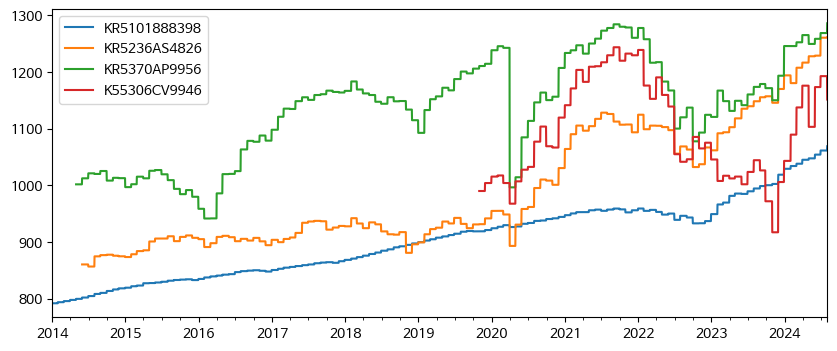

In [44]:
_ = df_hana.loc['2014':].plot(figsize=(10,4))

# Parameter Study

## WTR
*modified all weather*

In [33]:
selected = ['069500', '273130', '148070', '379800', '411060', '284430']
wtr.get_date_range().loc[selected]

,name,start date,end date,n
069500,KODEX 200,2002-10-14,2024-06-11,5354
273130,KODEX 종합채권(AA-이상)액티브,2017-06-29,2024-06-11,1708
148070,KOSEF 국고채10년,2011-10-20,2024-06-11,3113
379800,KODEX 미국S&P500TR,2021-04-09,2024-06-11,781
411060,ACE KRX금현물,2021-12-15,2024-06-11,611
284430,KODEX 200미국채혼합,2017-11-30,2024-06-11,1605


In [34]:
n_val = 260
n_lb = 0
df = df_wtr
df_train = df.iloc[:-n_val]
df_val = df.iloc[-n_val-n_lb:]

In [35]:
kwargs_bm = dict(
    initial_capital = 1e7,
    commissions = 0,
    align_axis = None, 
    days_in_year = 245,
    asset_names = assetnames_wtr
)

### Equal Weight

#### Cross-validate

In [13]:
from itertools import product

p_args = dict(
    p_freq = ['1m', '6m', '1y']
)
p_comb = list(product(*p_args.values()))
params = [{'name':f'WTR:f{x[0]}', 'freq':x[0]} 
            for x in p_comb]
params[0]

{'name': 'ETF:f1m', 'freq': '1m'}

In [14]:
bm = BacktestManager(df_train, **kwargs_bm)

10 assets from 2002-10-14 to 2023-05-17 uploaded.
running self.util_check_days_in_year to check days in a year


In [15]:
kwa_list = params
kwargs_build = dict(
    select=selected, reset_portfolios=True, build_cv=True
)
bm.build_batch(*kwa_list, **kwargs_build)

3 jobs prepared for cross-validation


In [16]:
bm.cross_validate(n_sample=20)

Cross-validating 3 strategies: ETF:f1m, ETF:f6m, ETF:f1y


100%|███████████████████████████████████████████████████████████████| 20/20 [01:11<00:00,  3.58s/it]


3.6 mins elapsed, 0.0 secs paused (0.0%)


#### Visualize

In [18]:
file = 'param_weather_equal.csv'

*Save param study*

In [18]:
f = dict(file=file, path=path_data)
df_cv = bm.get_cat_data(params, **f)

ERROR: failed to save as the file exists
3 param sets with 20 iterations per set


*Load param study*

In [19]:
bm = BacktestManager
df_cv = bm.catplot(file, path=path_data)

Returning data/param_weather_equal.csv
3 param sets with 20 iterations per set


In [ ]:
y = 'cagr'
#y = 'monthly_sharpe'
ref_val = 's&p500'

Returning cagr of s&p500 from 2002-10-14 to 2023-05-16


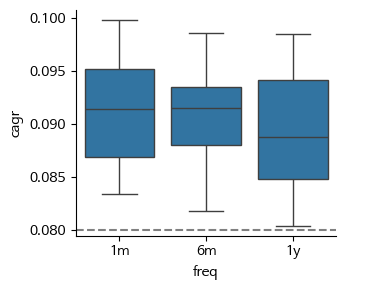

In [ ]:
kw = {'x':'freq', 'kind':'box'}
_ = bm.catplot(data=df_cv, y=y, ref_val=ref_val, height=3, aspect=1.2, **kw)

### All Combinations

In [26]:
df_train = df_wtr

#### Cross-validate

In [27]:
from itertools import product

p_args = dict(
    p_w = ['equally', 'erc', 'meanvar', 'invvol'],
    p_lookback = ['6m', '1y'],
    p_lag = [0],
    p_freq = ['1m', '1q', '6m', '1y']
)
p_comb = list(product(*p_args.values()))
params = [{'name':f'WTR:{x[0]}/lb{x[1]}/lg{x[2]}/f{x[3]}',
           'weigh':x[0], 'lookback':x[1], 'lag':x[2], 'freq':x[3]} 
            for x in p_comb]
params[0]

{'name': 'WTR:equally/lb6m/lg0/f1m',
 'weigh': 'equally',
 'lookback': '6m',
 'lag': 0,
 'freq': '1m'}

In [28]:
bm = BacktestManager(df_train, **kwargs_bm)

10 assets from 2002-10-14 to 2024-06-11 uploaded.
running self.util_check_days_in_year to check days in a year


In [29]:
kwa_list = params
kwargs_build = dict(
    select=selected, reset_portfolios=True, build_cv=True
)
bm.build_batch(*kwa_list, **kwargs_build)

32 jobs prepared for cross-validation


In [30]:
kw_batch = dict(size_batch=40, path_batch=path_data)
bm.cross_validate(n_sample=20, **kw_batch)

Cross-validating 32 strategies: WTR:equally/lb6m/lg0/f1m, WTR:equally/lb6m/lg0/f1q, ... , WTR:invvol/lb1y/lg0/f1y


100%|███████████████████████████████████████████████████████████████| 18/18 [01:00<00:00,  3.38s/it]


33.7 mins elapsed, 0.0 secs paused (0.0%)


#### Visualize

In [26]:
file = 'param_weather.csv'

*Save param study*

In [32]:
f = dict(file=file, path=path_data)
df_cv = bm.get_cat_data(params, **f)

param_weather.csv saved
32 param sets with 18 iterations per set


*Load param study*

In [27]:
bm = BacktestManager
df_cv = bm.catplot(file, path=path_data)

Returning data/param_weather.csv
32 param sets with 18 iterations per set


In [ ]:
#y = 'cagr'
y = 'monthly_sharpe'
ref_val = 's&p500'

Returning monthly_sharpe of s&p500 from 2002-10-14 to 2024-06-10


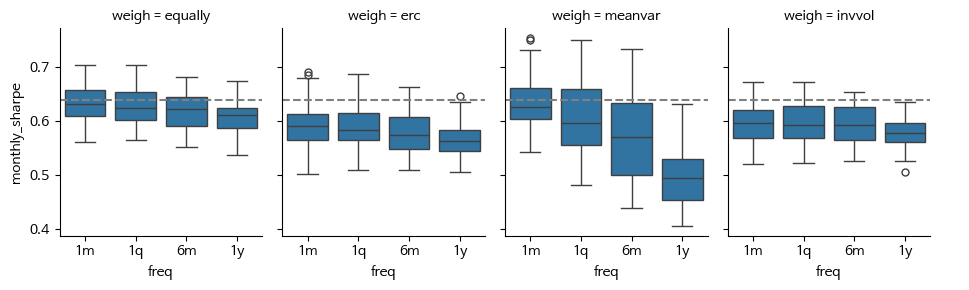

In [ ]:
#kw = {'hue':'lookback', 'x':'freq', 'col':'weigh', 'kind':'violin', 'split':True}
kw = {'x':'freq', 'col':'weigh', 'kind':'box'}
_ = bm.catplot(data=df_cv, y=y, ref_val=ref_val, height=3, aspect=.8, **kw)

#### Validation

In [48]:
n_val = 260
df_val = df_wtr.iloc[-n_val:]

In [49]:
bm = BacktestManager(df_val, **kwargs_bm)

bm.benchmark_ticker(name='s&p500')

10 assets from 2023-05-18 to 2024-06-11 uploaded.
running self.util_check_days_in_year to check days in a year
Benchmark is s&p500


In [50]:
# weigh, lookback(M), lag(D), freq(D)
p_comb = [['equally', 0, 0, '1m'],['equally', 0, 0, '1q'],['equally', 0, 0, '1y']]
kwa_list = [{'name':f'WTR:{x[0]}/lb{x[1]}/lg{x[2]}/f{x[3]}',
           'weigh':x[0], 'lookback':x[1], 'lag':x[2], 'freq':x[3]} 
            for x in p_comb]

Backtesting 4 strategies: s&p500, WTR:equally/lb0/lg0/f1m, WTR:equally/lb0/lg0/f1q, WTR:equally/lb0/lg0/f1y


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 10.29it/s]


Returning stats


,s&p500,WTR:equally/lb0/lg0/f1y,WTR:equally/lb0/lg0/f1m,WTR:equally/lb0/lg0/f1q
start,2023-05-17,2023-05-17,2023-05-17,2023-05-17
end,2024-06-10,2024-06-10,2024-06-10,2024-06-10
total_return,0.276965,0.067274,0.065888,0.064462
cagr,0.257305,0.062873,0.06158,0.06025
calmar,2.503847,1.275519,1.242609,1.221271
max_drawdown,-0.102764,-0.049292,-0.049557,-0.049334
avg_drawdown,-0.013855,-0.015095,-0.016645,-0.016762
avg_drawdown_days,10.214286,31.363636,34.3,34.3
daily_vol,0.115228,0.068728,0.068919,0.068943
daily_sharpe,2.188605,0.985515,0.964045,0.94424


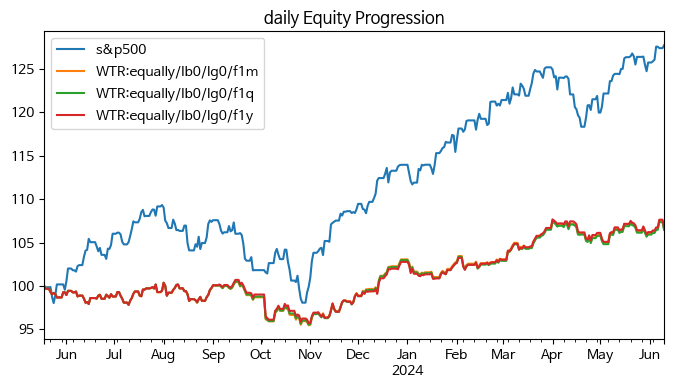

In [51]:
kwargs_build = dict(
    select='all'
)
bm.build_batch(*kwa_list, **kwargs_build)

bm.run(stats_sort_by='cagr', figsize=(8,4))

## FCTR

### All Factors

In [10]:
selected = ['MTUM','QUAL','SIZE','USMV','VLUE']
fctr.get_date_range().loc[selected]

,name,start date,end date,n
MTUM,iShares MSCI USA Momentum Factor ETF,2013-04-18,2024-10-18,2897
QUAL,iShares MSCI USA Quality Factor ETF,2013-07-18,2024-10-18,2834
SIZE,iShares MSCI USA Size Factor ETF,2013-04-18,2024-10-18,2897
USMV,iShares MSCI USA Min Vol Factor ETF,2011-10-20,2024-10-18,3270
VLUE,iShares MSCI USA Value Factor ETF,2013-04-18,2024-10-18,2897


In [11]:
n_val = 260
n_lb = 260
df = df_fctr
df_train = df.iloc[:-n_val]
df_val = df.iloc[-n_val-n_lb:]

In [12]:
kwargs_bm = dict(
    initial_capital = 1e5, # USD
    commissions = 0,
    align_axis = 0, 
    days_in_year = 252,
    asset_names = assetnames_fctr
)

#### Cross-validate

In [62]:
from itertools import product

p_args = dict(
    p_w = ['equally', 'erc', 'meanvar', 'invvol'],
    p_lookback = ['6m', '1y'],
    p_lag = [0, '1w', '1m'],
    p_freq = ['1q', '6m', '1y']
)
p_comb = list(product(*p_args.values()))
params = [{'name':f'FCTR:{x[0]}/lb{x[1]}/lg{x[2]}/f{x[3]}',
           'weigh':x[0], 'lookback':x[1], 'lag':x[2], 'freq':x[3]} 
            for x in p_comb]
params[0]

{'name': 'FCTR:equally/lb6m/lg0/f1q',
 'weigh': 'equally',
 'lookback': '6m',
 'lag': 0,
 'freq': '1q'}

In [63]:
bm = BacktestManager(df_train, **kwargs_bm)

period reset: 2015-04-30 ~ 2023-10-06
7 assets from 2015-04-30 to 2023-10-06 uploaded.
running self.util_check_days_in_year to check days in a year


In [64]:
kwa_list = params
kwargs_build = dict(
    select=selected, reset_portfolios=True, build_cv=True
)
bm.build_batch(*kwa_list, **kwargs_build)

72 jobs prepared for cross-validation


In [118]:
kw_batch = dict(size_batch=40, path_batch=path_data)
bm.cross_validate(n_sample=20, **kw_batch)

Cross-validating 72 strategies: FACTOR:equally/lb6m/lg0/f1q, FACTOR:equally/lb6m/lg0/f6m, ... , FACTOR:invvol/lb1y/lg1m/f1y


100%|███████████████████████████████████████████████████████████████| 20/20 [00:14<00:00,  1.39it/s]


20.9 mins elapsed, 0.0 secs paused (0.0%)
Temp batch files deleted


In [ ]:
#bm.cross_validate(n_sample=20)

#### Visualize

In [13]:
file = 'param_factor_ishares5.csv'

*Save param study*

In [120]:
f = dict(file=file, path=path_data)
df_cv = bm.get_cat_data(params, **f)

data/param_factor_ishares.csv saved
72 param sets with 20 iterations per set


*Load param study*

In [14]:
bm = BacktestManager
df_cv = bm.catplot(file, path=path_data)

Returning data/param_factor_ishares.csv
72 param sets with 20 iterations per set


In [25]:
y = 'monthly_sharpe' #'cagr'
ref_val = 's&p500'
#ref_val = ('LRGF', 'yahoo')

[*********************100%***********************]  1 of 1 completed

Returning monthly_sharpe of Adj Close from 2015-04-29 to 2022-01-04


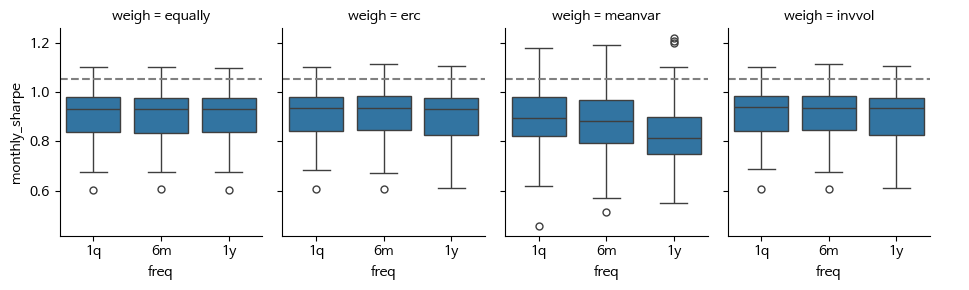

In [26]:
#kw = {'x':'lookback', 'col':'weigh', 'row':'freq', 'kind':'box'}
#kw = {'x':'freq', 'col':'weigh', 'row':'lookback', 'kind':'box'}
#kw = {'x':'freq', 'col':'weigh', 'hue':'lookback', 'kind':'violin', 'split':True}
kw = {'x':'freq', 'col':'weigh', 'kind':'box'}

_ = bm.catplot(data=df_cv, y=y, ref_val=ref_val, height=3, aspect=.8, **kw)

#### Validation

In [13]:
bm = BacktestManager(df_val, **kwargs_bm)

bm.benchmark_ticker('s&p500')
bm.benchmark('LRGF')

7 assets from 2022-09-26 to 2024-10-18 uploaded.
running self.util_check_days_in_year to check days in a year


[*********************100%***********************]  1 of 1 completed

Benchmark is s&p500


In [14]:
# weigh, lookback(M), lag(D), freq(D)
p_comb = [['equally', '1q', 0, 0], ['equally', '1y', 0, 0]]
kwa_list = [{'name':f'FCTR:{x[0]}/lb{x[1]}/lg{x[2]}/f{x[3]}',
           'weigh':x[0], 'lookback':x[1], 'lag':x[2], 'freq':x[3]} 
            for x in p_comb]

In [15]:
selected

['MTUM', 'QUAL', 'SIZE', 'USMV', 'VLUE']

Backtesting 4 strategies: s&p500, LRGF, FCTR:equally/lb1q/lg0/f0, FCTR:equally/lb1y/lg0/f0


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  4.74it/s]


Returning stats


,LRGF,s&p500,FCTR:equally/lb1q/lg0/f0,FCTR:equally/lb1y/lg0/f0
start,2022-09-25,2022-09-25,2022-09-25,2022-09-25
end,2024-10-17,2024-10-17,2024-10-17,2024-10-17
total_return,0.680369,0.64429,0.40722,0.341595
cagr,0.286278,0.272807,0.180224,0.153198
calmar,2.995093,2.739532,1.945216,1.991193
max_drawdown,-0.095582,-0.099581,-0.09265,-0.076938
avg_drawdown,-0.017578,-0.018307,-0.015482,-0.012978
avg_drawdown_days,12.978723,13.021277,13.219512,8.171429
daily_vol,0.152894,0.148968,0.113647,0.086296
daily_sharpe,1.725159,1.69585,1.516729,1.696929


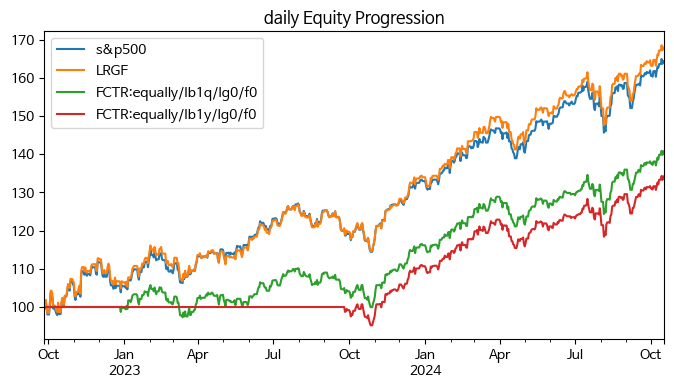

In [16]:
kwargs_build = dict(
    select=selected
)
bm.build_batch(*kwa_list, **kwargs_build)

bm.run(stats_sort_by='cagr', figsize=(8,4))

### Selected

In [35]:
#selected = ['QUAL','SIZE','USMV','VLUE']
selected = ['QUAL','SIZE','VLUE']
fctr.get_date_range().loc[selected]

,name,start date,end date,n
QUAL,iShares MSCI USA Quality Factor ETF,2013-07-18,2024-10-18,2834
SIZE,iShares MSCI USA Size Factor ETF,2013-04-18,2024-10-18,2897
VLUE,iShares MSCI USA Value Factor ETF,2013-04-18,2024-10-18,2897


In [36]:
n_val = 260
n_lb = 260
df = df_fctr
df_train = df.iloc[:-n_val]
df_val = df.iloc[-n_val-n_lb:]

In [37]:
kwargs_bm = dict(
    initial_capital = 1e5, # USD
    commissions = 0,
    align_axis = 0, 
    days_in_year = 252,
    asset_names = assetnames_fctr
)

#### Cross-validate

In [39]:
from itertools import product

p_args = dict(
    p_w = ['equally', 'erc', 'meanvar', 'invvol'],
    p_lookback = ['6m', '1y'],
    p_lag = [0, '1w', '1m'],
    p_freq = ['1q', '6m', '1y']
)
p_args = dict(
    p_w = ['equally'],
    p_lookback = [0],
    p_lag = [0],
    p_freq = ['1q', '6m', '1y']
)
p_comb = list(product(*p_args.values()))
params = [{'name':f'FCTR:{x[0]}/lb{x[1]}/lg{x[2]}/f{x[3]}',
           'weigh':x[0], 'lookback':x[1], 'lag':x[2], 'freq':x[3]} 
            for x in p_comb]
params[0]

{'name': 'FCTR:equally/lb0/lg0/f1q',
 'weigh': 'equally',
 'lookback': 0,
 'lag': 0,
 'freq': '1q'}

In [40]:
bm = BacktestManager(df_train, **kwargs_bm)

period reset: 2015-04-30 ~ 2023-10-06
7 assets from 2015-04-30 to 2023-10-06 uploaded.
running self.util_check_days_in_year to check days in a year


In [41]:
selected

['QUAL', 'SIZE', 'VLUE']

In [42]:
kwa_list = params
kwargs_build = dict(
    select=selected, reset_portfolios=True, build_cv=True
)
bm.build_batch(*kwa_list, **kwargs_build)

3 jobs prepared for cross-validation


In [43]:
kw_batch = dict(size_batch=40, path_batch=path_data)
bm.cross_validate(n_sample=20, **kw_batch)

Cross-validating 3 strategies: FCTR:equally/lb0/lg0/f1q, FCTR:equally/lb0/lg0/f6m, FCTR:equally/lb0/lg0/f1y


100%|███████████████████████████████████████████████████████████████| 18/18 [00:24<00:00,  1.37s/it]


1.2 mins elapsed, 0.0 secs paused (0.0%)


#### Visualize

In [44]:
#file = 'param_factor_ishares4.csv'
file = 'param_factor_ishares3.csv'

*Save param study*

In [45]:
f = dict(file=file, path=path_data)
df_cv = bm.get_cat_data(params, **f)

param_factor_ishares3.csv saved
3 param sets with 18 iterations per set


*Load param study*

In [46]:
bm = BacktestManager
df_cv = bm.catplot(file, path=path_data)

Returning data/param_factor_ishares3.csv
3 param sets with 18 iterations per set


In [49]:
y = 'monthly_sharpe' #'cagr'
ref_val = 's&p500'
#ref_val = ('LRGF', 'yahoo')

[*********************100%***********************]  1 of 1 completed

Returning monthly_sharpe of s&p500 from 2015-04-29 to 2023-10-05


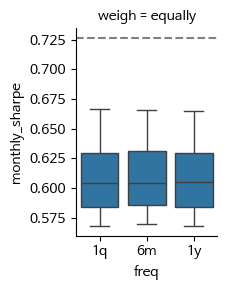

In [50]:
#kw = {'x':'lookback', 'col':'weigh', 'row':'freq', 'kind':'box'}
#kw = {'x':'freq', 'col':'weigh', 'row':'lookback', 'kind':'box'}
#kw = {'x':'freq', 'col':'weigh', 'hue':'lookback', 'kind':'violin', 'split':True}
kw = {'x':'freq', 'col':'weigh', 'kind':'box'}

_ = bm.catplot(data=df_cv, y=y, ref_val=ref_val, height=3, aspect=.8, **kw)

## IRP

In [66]:
irp.get_date_range()

,name,start date,end date,n
K55105BS5067,삼성한국형TDF2040증권투자신탁H[주식혼합-재간접형]C-Pe,2017-07-31,2024-08-26,2584
K55223BT1450,KB온국민TDF2040증권투자신탁(주식혼합-재간접형)C-퇴직e,2017-07-31,2024-08-26,2584
K55301BU5479,미래에셋전략배분TDF2045혼합자산자투자신탁 종류C-P2e,2017-08-14,2024-08-26,2570
K55207BU0715,교보악사파워인덱스증권자투자신탁1호(주식)C-Pe,2017-08-31,2024-08-26,2553
K55210BU2435,신한마음편한TDF2040증권투자신탁[주식혼합-재간접형](종류C-re),2017-08-31,2024-08-26,2553
K55365BT3694,kcgi코리아퇴직연금증권자투자신탁(주식)종류C-Pe2,2017-08-31,2024-08-26,2553
KR5223AE3357,kb퇴직연금배당증권자투자신탁(주식)C-E,2017-08-31,2024-08-26,2553
K55301BU6139,미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e,2017-09-20,2024-08-26,2533
K55301BU5453,미래에셋평생소득TIF혼합자산자투자신탁종류C-P2e,2017-09-29,2024-08-26,2524
K55203C53681,대신KOSPI200인덱스증권자투자신탁(주식-파생형)CPe,2018-04-30,2024-08-26,2311


In [67]:
n_val = 300
n_lb = 260
df = df_irp
df_train = df.iloc[:-n_val]
df_val = df.iloc[-n_val-n_lb:]

In [68]:
kwargs_bm = dict(
    initial_capital = 1e7,
    commissions = 0,
    align_axis = 0, 
    days_in_year = 365,
    asset_names = assetnames_irp
)

### Selected

In [69]:
selected = ['K55301BU6139', 'K55206C95800']
irp.get_names(selected)

0) K55301BU6139: 미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e
1) K55206C95800: 키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)

In [70]:
irp.get_date_range().loc[selected]

,name,start date,end date,n
K55301BU6139,미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e,2017-09-20,2024-08-26,2533
K55206C95800,키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금),2018-07-26,2024-08-26,2224


#### Cross-validate

In [71]:
from itertools import product

p_args = dict(
    p_w = ['equally', 'erc', 'meanvar', 'invvol'],
    p_lookback = ['6m', '1y'],
    p_lag = [0],
    p_freq = ['6m', '1y']
)
p_comb = list(product(*p_args.values()))
params = [{'name':f'IRP:{x[0]}/lb{x[1]}/lg{x[2]}/f{x[3]}',
           'weigh':x[0], 'lookback':x[1], 'lag':x[2], 'freq':x[3]} 
            for x in p_comb]
params[0]

{'name': 'IRP:equally/lb6m/lg0/f6m',
 'weigh': 'equally',
 'lookback': '6m',
 'lag': 0,
 'freq': '6m'}

In [72]:
bm = BacktestManager(df_train, **kwargs_bm)

period reset: 2019-01-31 ~ 2023-10-31
14 assets from 2019-01-31 to 2023-10-31 uploaded.
running self.util_check_days_in_year to check days in a year


In [73]:
kwa_list = params
kwargs_build = dict(
    select=selected, reset_portfolios=True, build_cv=True
)
bm.build_batch(*kwa_list, **kwargs_build)

16 jobs prepared for cross-validation


In [23]:
bm.cross_validate(n_sample=20)

Cross-validating 16 strategies: IRP:equally/lb6m/lg0/f6m, IRP:equally/lb6m/lg0/f1y, ... , IRP:invvol/lb1y/lg0/f1y


100%|███████████████████████████████████████████████████████████████| 19/19 [00:18<00:00,  1.00it/s]


6.2 mins elapsed, 0.0 secs paused (0.0%)


#### Visualize

In [24]:
file = 'param_irp_s1.csv'

*Save param study*

In [25]:
f = dict(file=file, path=path_data)
df_cv = bm.get_cat_data(params, **f)

data/param_irp_s1.csv saved
16 param sets with 19 iterations per set


*Load param study*

In [26]:
bm = BacktestManager
df_cv = bm.catplot(file, path=path_data)

Returning data/param_irp_s1.csv
16 param sets with 19 iterations per set


In [27]:
y = 'cagr'
ref_val = bm.benchmark_stats(y, data=df_cv, name='s&p500')

Returning cagr of s&p500 from 2019-01-29 to 2023-10-30


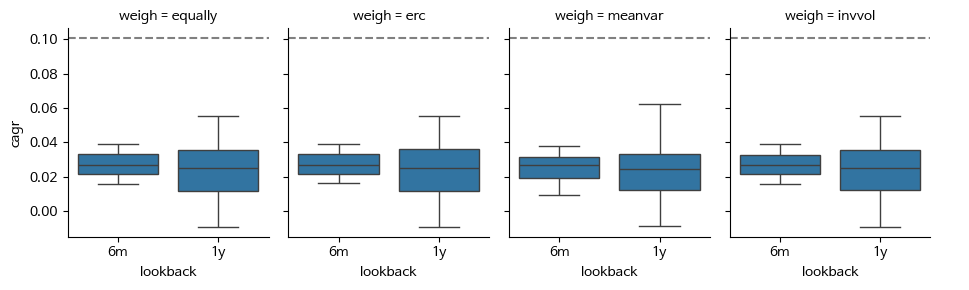

In [28]:
#kw = {'x':'lookback', 'col':'weigh', 'row':'freq', 'kind':'box'}
#kw = {'x':'lookback', 'col':'weigh', 'hue':'freq'}
kw = {'x':'lookback', 'col':'weigh', 'kind':'box'}

_ = bm.catplot(data=df_cv, y=y, ref_val=ref_val, height=3, aspect=.8, **kw)

Returning monthly_sharpe of s&p500 from 2019-01-29 to 2023-10-30


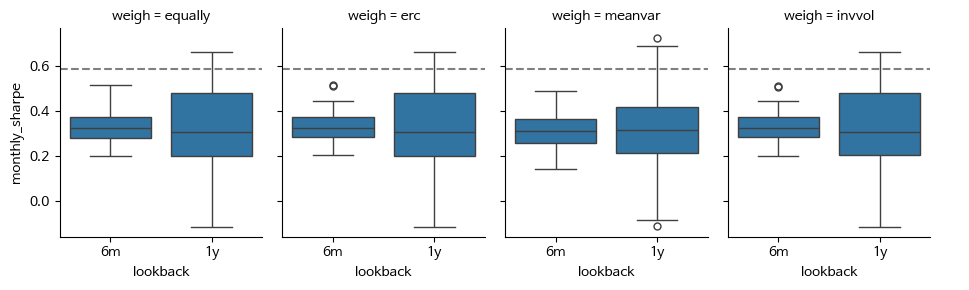

In [29]:
y = 'monthly_sharpe'
ref_val = bm.benchmark_stats(y, data=df_cv, name='s&p500')
_ = bm.catplot(data=df_cv, y=y, ref_val=ref_val, height=3, aspect=.8, **kw)

#### Validation

In [33]:
bm = BacktestManager(df_val, **kwargs_bm)

bm.benchmark_ticker(name='kodex200')
bm.benchmark_ticker(name='s&p500')

14 assets from 2023-02-14 to 2024-08-26 uploaded.
running self.util_check_days_in_year to check days in a year
Benchmark is kodex200
Benchmark is s&p500


In [34]:
# weigh, lookback(M), lag(D), freq(D)
p_comb = [['equally', 0, 0, '6m'], ['equally', 0, 0, '1y']]
kwa_list = [{'name':f'FACTOR:{x[0]}/lb{x[1]}/lg{x[2]}/f{x[3]}',
           'weigh':x[0], 'lookback':x[1], 'lag':x[2], 'freq':x[3]} 
            for x in p_comb]

In [35]:
selected

['K55301BU6139', 'K55206C95800']

Backtesting 4 strategies: kodex200, s&p500, FACTOR:equally/lb0/lg0/f6m, FACTOR:equally/lb0/lg0/f1y


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  4.04it/s]

Returning stats


,s&p500,FACTOR:equally/lb0/lg0/f1y,FACTOR:equally/lb0/lg0/f6m,kodex200
start,2023-02-13,2023-02-13,2023-02-13,2023-02-13
end,2024-08-23,2024-08-23,2024-08-23,2024-08-23
total_return,0.362183,0.178826,0.178823,0.170321
cagr,0.224684,0.113917,0.113915,0.10864
calmar,2.186951,1.876858,1.876853,0.659558
max_drawdown,-0.102739,-0.060696,-0.060695,-0.164717
avg_drawdown,-0.017402,-0.00977,-0.009769,-0.030855
avg_drawdown_days,12.228571,14.517241,14.517241,20.583333
daily_vol,0.128331,0.054383,0.054373,0.185418
daily_sharpe,1.732164,2.12199,2.122335,0.680727


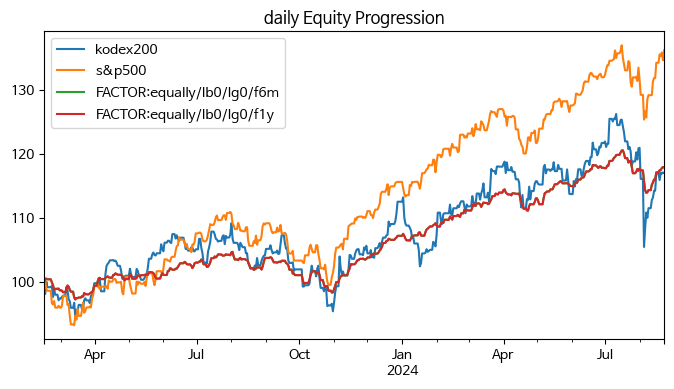

In [36]:
kwargs_build = dict(
    select=selected
)
bm.build_batch(*kwa_list, **kwargs_build)

bm.run(stats_sort_by='cagr', figsize=(8,4))

### Momentum

In [74]:
irp.get_names()

0) K55105BS5067: 삼성한국형TDF2040증권투자신탁H[주식혼합-재간접형]C-Pe
1) K55203C53681: 대신KOSPI200인덱스증권자투자신탁(주식-파생형)CPe
2) K55206C95800: 키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)
3) K55206C96311: 키움키워드림TDF2045증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)
4) K55207BU0715: 교보악사파워인덱스증권자투자신탁1호(주식)C-Pe
5) K55210BU2435: 신한마음편한TDF2040증권투자신탁[주식혼합-재간접형](종류C-re)
6) K55213C51890: 한화LIFEPLUSTDF2040증권자투자신탁(혼합-재간접형)C-RPe(퇴직연금)
7) K55223BT1450: KB온국민TDF2040증권투자신탁(주식혼합-재간접형)C-퇴직e
8) K55234CJ0997: IBK플레인바닐라EMP증권투자신탁(혼합-재간접형)C-Re
9) K55301BU5453: 미래에셋평생소득TIF혼합자산자투자신탁종류C-P2e
10) K55301BU5479: 미래에셋전략배분TDF2045혼합자산자투자신탁 종류C-P2e
11) K55301BU6139: 미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e
12) K55365BT3694: kcgi코리아퇴직연금증권자투자신탁(주식)종류C-Pe2
13) KR5223AE3357: kb퇴직연금배당증권자투자신탁(주식)C-E

#### Cross-validate

In [52]:
from itertools import product

p_args = dict(
    p_n_assets = [2, 4],
    p_lookback = ['6m', '1y'],
    p_lag = [0, '1m', '2m'],
    p_freq = ['6m', '1y']
)
p_comb = list(product(*p_args.values()))
params = [{'name':f'IRP:n{x[0]}/lb{x[1]}/lg{x[2]}/f{x[3]}',
           'n_assets':x[0], 'lookback':x[1], 'lag':x[2], 'freq':x[3]} 
            for x in p_comb]
params[0]

{'name': 'IRP:n2/lb6m/lg0/f6m',
 'n_assets': 2,
 'lookback': '6m',
 'lag': 0,
 'freq': '6m'}

In [53]:
bm = BacktestManager(df_train, **kwargs_bm)

period reset: 2019-01-31 ~ 2023-10-31
14 assets from 2019-01-31 to 2023-10-31 uploaded.
running self.util_check_days_in_year to check days in a year


In [54]:
kwa_list = params
kwargs_build = dict(
    select='Momentum', weigh='Equally', reset_portfolios=True, build_cv=True
)
bm.build_batch(*kwa_list, **kwargs_build)

24 jobs prepared for cross-validation


In [55]:
kw_batch = dict(size_batch=0, path_batch=path_data)
bm.cross_validate(n_sample=20, **kw_batch)

Cross-validating 24 strategies: IRP:n2/lb6m/lg0/f6m, IRP:n2/lb6m/lg0/f1y, ... , IRP:n4/lb1y/lg2m/f1y


100%|███████████████████████████████████████████████████████████████| 19/19 [00:34<00:00,  1.83s/it]


14.4 mins elapsed, 0.0 secs paused (0.0%)


#### Visualize

In [56]:
file = 'param_irp_s2.csv'

*Save param study*

In [57]:
f = dict(file=file, path=path_data)
df_cv = bm.get_cat_data(params, **f)

data/param_irp_s2.csv saved
24 param sets with 19 iterations per set


*Load param study*

In [58]:
bm = BacktestManager
df_cv = bm.catplot(file, path=path_data)

Returning data/param_irp_s2.csv
24 param sets with 19 iterations per set


In [59]:
#kw = {'row':'lookback', 'col':'n_assets', 'x':'freq', 'kind':'box'}
#kw = {'row':'lookback', 'col':'n_assets', 'x':'freq', 'hue':'lag'}
#kw = {'hue':'lookback', 'col':'n_assets', 'x':'freq', 'row':'lag', 'kind':'violin', 'split':True}
kw = {'hue':'lookback', 'col':'n_assets', 'row':'freq', 'x':'lag', 'kind':'violin', 'split':True}

Returning cagr of s&p500 from 2019-01-29 to 2023-10-30


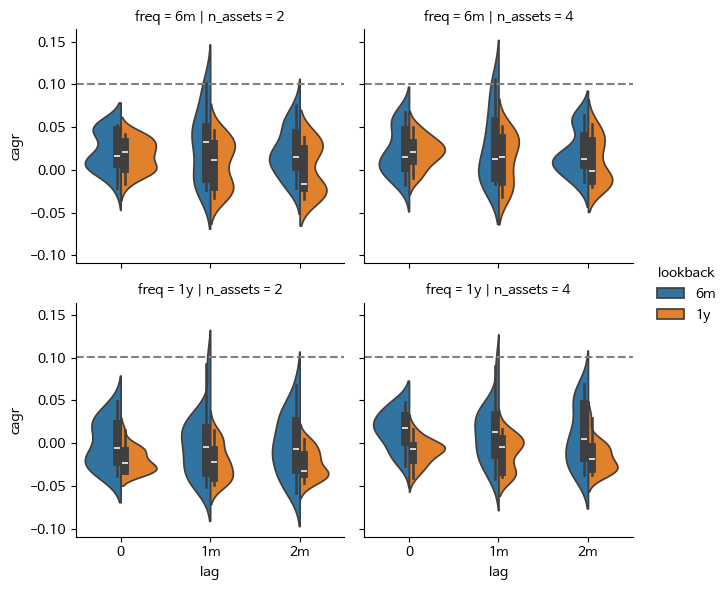

In [60]:
y = 'cagr'
ref_val = bm.benchmark_stats(y, data=df_cv, name='s&p500')
_ = bm.catplot(data=df_cv, y=y, ref_val=ref_val, height=3, aspect=1.1, **kw)

#### Validation

In [65]:
len(df_val)

560

In [61]:
kwargs_bm = dict(
    initial_capital = 1e7,
    commissions = 0,
    align_axis = None, 
    days_in_year = 365,
    asset_names = assetnames_irp
)

In [62]:
bm = BacktestManager(df_val, **kwargs_bm)

bm.benchmark_ticker(name='kodex200')
bm.benchmark_ticker(name='s&p500')

14 assets from 2023-02-14 to 2024-08-26 uploaded.
running self.util_check_days_in_year to check days in a year
Benchmark is kodex200
Benchmark is s&p500


In [63]:
# n, lookback(M), lag(D), freq(D)
p_comb = [[4, '1y', 0, '6m']]
kwa_list = [{'name':f'FACTOR:n{x[0]}/lb{x[1]}/lg{x[2]}/f{x[3]}',
           'n_assets':x[0], 'lookback':x[1], 'lag':x[2], 'freq':x[3]} 
            for x in p_comb]

Backtesting 3 strategies: kodex200, s&p500, FACTOR:n4/lb1y/lg0/f6m


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  3.67it/s]

Returning stats


,s&p500,kodex200,FACTOR:n4/lb1y/lg0/f6m
start,2023-02-13,2023-02-13,2023-02-13
end,2024-08-23,2024-08-23,2024-08-23
total_return,0.362183,0.170321,0.0
cagr,0.224684,0.10864,0.0
calmar,2.186951,0.659558,NaN
max_drawdown,-0.102739,-0.164717,0.0
avg_drawdown,-0.017402,-0.030855,NaN
avg_drawdown_days,12.228571,20.583333,NaN
daily_vol,0.128331,0.185418,0.0
daily_sharpe,1.732164,0.680727,NaN


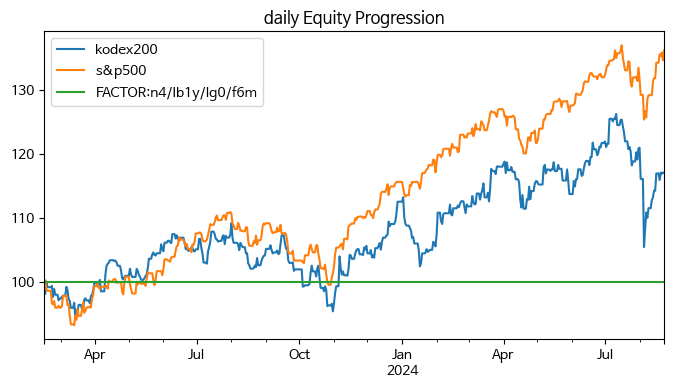

In [64]:
kwargs_build = dict(
    select='momentum', weigh='Equally'
)
bm.build_batch(*kwa_list, **kwargs_build)

bm.run(stats_sort_by='cagr', figsize=(8,4))

## HANA

In [75]:
hana.get_date_range()

,name,start date,end date,n
KR5101888398,한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e),2010-01-29,2024-07-31,5298
KR5370AP9956,AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce,2014-04-30,2024-07-31,3746
KR5236AS4826,한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E,2014-05-30,2024-07-31,3716
K55306CV9946,다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce,2019-10-31,2024-07-31,1736


In [79]:
n_val = 260
n_lb = 0
df = df_hana
df_train = df.iloc[:-n_val]
df_val = df.iloc[-n_val-n_lb:]

In [80]:
kwargs_bm = dict(
    initial_capital = 1e7,
    commissions = 0,
    align_axis = None, 
    days_in_year = 365,
    asset_names = assetnames_hana
)

### Selected

In [14]:
hana.get_names()

0) KR5101888398: 한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)
1) KR5236AS4826: 한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E
2) KR5370AP9956: AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce
3) K55306CV9946: 다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce

#### Cross-validate

In [16]:
from itertools import product

p_args = dict(
    p_w = ['equally', 'erc', 'meanvar', 'invvol'],
    p_lookback = ['6m', '1y', '2y'],
    p_lag = [0],
    p_freq = ['6m', '1y']
)
p_comb = list(product(*p_args.values()))
params = [{'name':f'HANA:{x[0]}/lb{x[1]}/lg{x[2]}/f{x[3]}',
           'weigh':x[0], 'lookback':x[1], 'lag':x[2], 'freq':x[3]} 
            for x in p_comb]
params[0]

{'name': 'HANA:equally/lb6m/lg0/f6m',
 'weigh': 'equally',
 'lookback': '6m',
 'lag': 0,
 'freq': '6m'}

In [17]:
bm = BacktestManager(df_train, **kwargs_bm)

4 assets from 2010-01-29 to 2023-10-05 uploaded.
running self.util_check_days_in_year to check days in a year


In [19]:
kwa_list = params
kwargs_build = dict(
    select='all', reset_portfolios=True, build_cv=True
)
bm.build_batch(*kwa_list, **kwargs_build)

24 jobs prepared for cross-validation


In [20]:
kw_batch = dict(size_batch=0, path_batch=path_data)
bm.cross_validate(n_sample=20, **kw_batch)

Cross-validating 24 strategies: HANA:equally/lb6m/lg0/f6m, HANA:equally/lb6m/lg0/f1y, ... , HANA:invvol/lb2y/lg0/f1y


100%|███████████████████████████████████████████████████████████████| 19/19 [00:30<00:00,  1.60s/it]


12.9 mins elapsed, 0.0 secs paused (0.0%)


#### Visualize

In [14]:
file = 'param_hana_s1.csv'

*Save param study*

In [22]:
f = dict(file=file, path=path_data)
df_cv = bm.get_cat_data(params, **f)

data/param_hana_s1.csv saved
24 param sets with 19 iterations per set


*Load param study*

In [15]:
bm = BacktestManager
df_cv = bm.catplot(file, path=path_data)

Returning data/param_hana_s1.csv
24 param sets with 19 iterations per set


In [16]:
y = 'cagr'
ref_val = bm.benchmark_stats(y, data=df_cv, name='s&p500')

Returning cagr of s&p500 from 2010-01-27 to 2023-10-04


In [26]:
#kw = {'row':'lookback', 'col':'freq', 'x':'weigh', 'hue':'lag'}
#kw = {'x':'lookback', 'col':'weigh', 'row':'freq', 'hue':'lag'}
#kw = {'x':'lookback', 'col':'weigh', 'row':'freq', 'kind':'box'}
kw = {'x':'weigh', 'hue':'freq', 'col':'lookback', 'kind':'violin', 'split':True, 'inner':None}

Returning cagr of kospi from 2010-01-28 to 2023-10-05


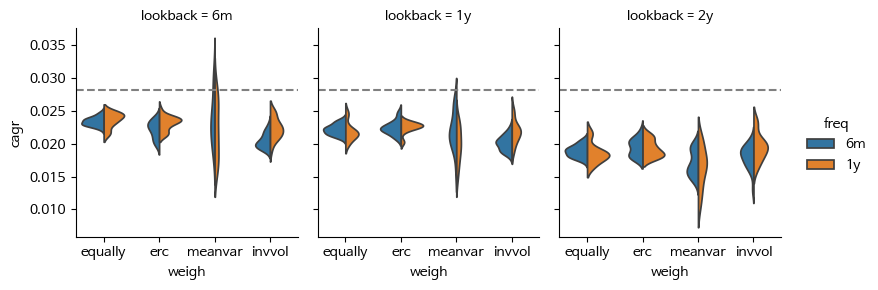

In [27]:
y = 'cagr'
ref_val = 'kospi' #'s&p500'
_ = bm.catplot(data=df_cv, y=y, ref_val=ref_val, height=3, aspect=.9, **kw)

#### Validation

In [32]:
bm = BacktestManager(df_val, **kwargs_bm)

bm.benchmark_ticker(name='kodex200')
bm.benchmark('s&p500')

4 assets from 2023-01-19 to 2024-07-31 uploaded.
running self.util_check_days_in_year to check days in a year
Benchmark is kodex200
ERROR: check arg dfs


In [33]:
# weigh, lookback(M), lag(D), freq(D)
p_comb = [['meanvar', '6m', 0, '1y'], ['equally', '6m', 0, '1y'], ['equally', 0, 0, '1y']]
kwa_list = [{'name':f'HANA:{x[0]}/lb{x[1]}/lg{x[2]}/f{x[3]}',
           'weigh':x[0], 'lookback':x[1], 'lag':x[2], 'freq':x[3]} 
            for x in p_comb]

Backtesting 4 strategies: kodex200, HANA:meanvar/lb6m/lg0/f1y, HANA:equally/lb6m/lg0/f1y, HANA:equally/lb0/lg0/f1y


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  6.05it/s]


Returning stats


,kodex200,HANA:equally/lb0/lg0/f1y,HANA:equally/lb6m/lg0/f1y,HANA:meanvar/lb6m/lg0/f1y
start,2023-01-18,2023-01-18,2023-01-18,2023-01-18
end,2024-07-31,2024-07-31,2024-07-31,2024-07-31
total_return,0.246558,0.141851,0.105622,0.085868
cagr,0.154587,0.090372,0.067682,0.0552
calmar,1.224666,2.759825,1.972666,6.212704
max_drawdown,-0.126228,-0.032746,-0.03431,-0.008885
avg_drawdown,-0.027691,-0.011109,-0.018062,-0.006729
avg_drawdown_days,21.086957,42.2,40.666667,31.0
daily_vol,0.160916,0.057979,0.056311,0.035172
daily_sharpe,0.998316,1.562215,1.222921,1.58728


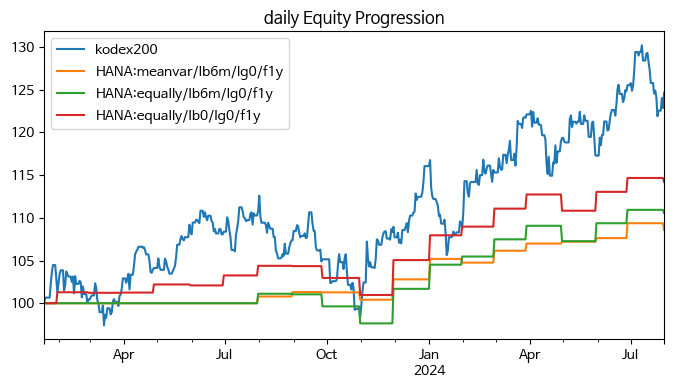

In [35]:
kwargs_build = dict(
    select='all'
)
bm.build_batch(*kwa_list, **kwargs_build)

bm.run(stats_sort_by='cagr', figsize=(8,4))